TWITTER SENTIMENT ANALYSIS

EDA

IMPORTING NECESSARY LIBRARIES

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import re

In [3]:
#Converting the clean dataset to dataframe
df = pd.read_csv(r'C:\Projects\Twitter sentiment analysis\cleaned_tweets.csv')
df.head()

,target,id,date,flag,user,text,emoji,preprocessed,clean_tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",False,"['@switchfoot', ""that's"", 'bummer', 'shoulda',...",@switchfoot that's bummer shoulda get david ca...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,False,"['upset', ""can't"", 'update', 'facebook', 'text...",upset can't update facebook texting ... might ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,False,"['@kenichan', 'dive', 'many', 'time', 'ball', ...",@kenichan dive many time ball manage save 50 r...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,False,"['whole', 'body', 'feel', 'itchy', 'like', 'fi...",whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",False,"['@nationwideclass', 'behave', ""i'm"", 'mad', ""...",@nationwideclass behave i'm mad can't see


In [4]:
# Since we have float values
df['clean_tweets'] = df['clean_tweets'].astype(str)

In [5]:
#Loading the clean_tweets into a variable
data = " ".join([sentence for sentence in df['clean_tweets']])

In [6]:
#Making sure the data does not have float values
float_values = [item for item in data if isinstance(item, float)]
print(float_values)

[]


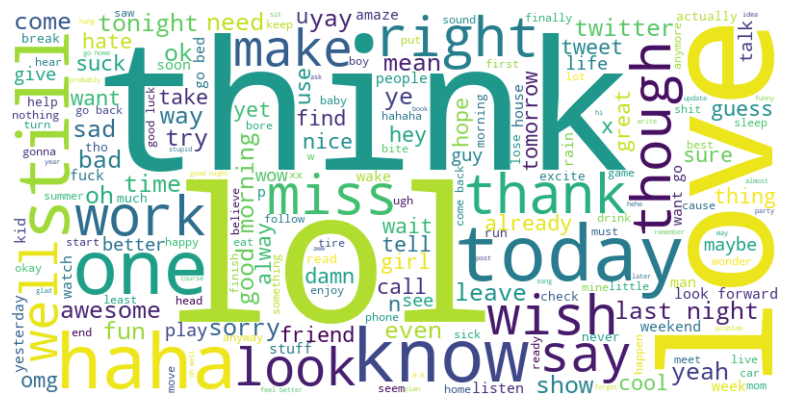

In [7]:
cloud = WordCloud(width=800, height=400, background_color='white').generate(data)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
#Loading positive tweets into a variable
positive_data = " ".join([sentence for sentence in df['clean_tweets'][df['target']==4]])

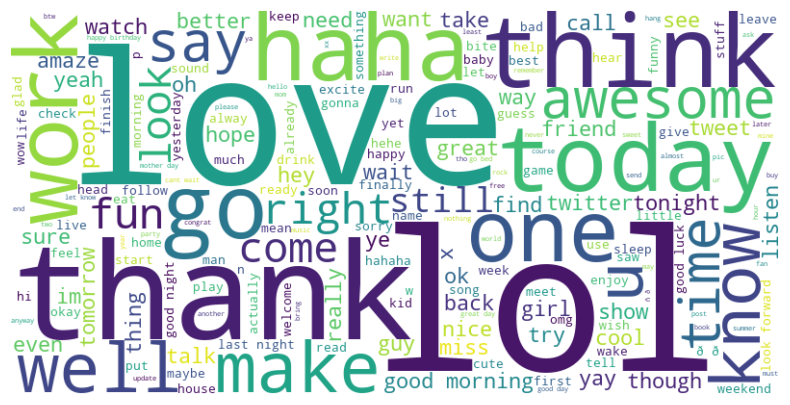

In [9]:
positive_cloud = WordCloud(width=800, height=400, background_color='white').generate(positive_data)

# Display the positive word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
#Loading negative tweets into a variable
negative_data = " ".join([sentence for sentence in df['clean_tweets'][df['target']==0]])

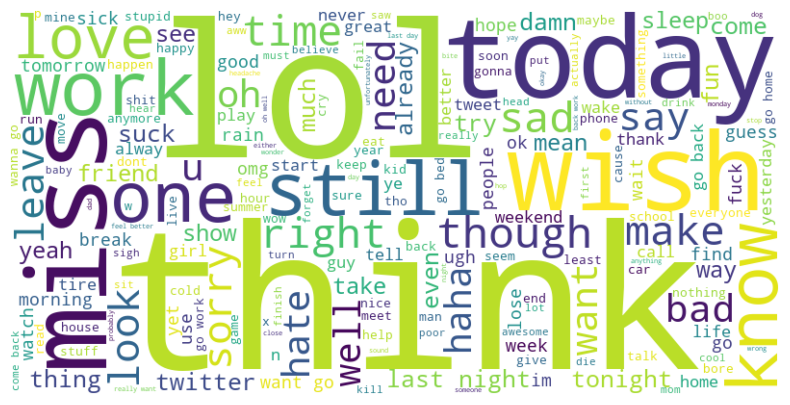

In [11]:
negative_cloud = WordCloud(width=800, height=400, background_color='white').generate(negative_data)

# Display the negative word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(negative_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

EXTRACTING HASHTAG FROM TWEETS TO FIND TOPIC OF THE TWEET

In [30]:
#Extracting positive hashtags

positive_hashtags = []

for tweet, target in zip(df["clean_tweets"], df["target"]):
    if target == 4:
        hashtags = re.findall(r'#\w+', tweet)
        positive_hashtags.extend(hashtags)

positive_hashtag_counts = pd.Series(positive_hashtags).value_counts()

print(positive_hashtags)
print(positive_hashtag_counts)

['#devunity', '#alexa', '#japan', '#skype', '#expletives', '#musicmonday', '#chuck', '#nightcard', '#paragon', '#dogs', '#24', '#baumarkt', '#baumarkt', '#vegas', '#1liners', '#hhrs', '#blib', '#nbn', '#tlot', '#blib', '#bumptop', '#girlguidecookies', '#nru', '#castle', '#gratitude', '#triathlon', '#startrekmovie', '#worldprayer', '#wbc2', '#php', '#canucks', '#blib', '#gotmilk', '#mariners', '#trek', '#rofl', '#openingday', '#kfanyc', '#sf', '#house', '#sci', '#iphone', '#spotify', '#statravel', '#wv09', '#webvisions', '#openaustralia', '#publicwhip', '#adtech', '#bludget', '#b09', '#30da', '#thegadgetshow', '#gmail', '#heroes', '#royksopp', '#swedish', '#russian', '#avatar', '#mef', '#bpark', '#cloudforce', '#datajourn', '#mmuk09', '#bus', '#videotlv', '#business', '#fb', '#thebarn', '#design', '#dogtraders', '#claritylive', '#iloveyou', '#heyxboxlive', '#spbpuk', '#twinelis', '#katesparty', '#totd', '#kidscleaning', '#discount', '#politikana', '#retweet', '#pinkchaddi', '#rockbox', 

In [29]:
#Extracting negative hashtags

negative_hashtags = []

for tweet, target in zip(df["clean_tweets"], df["target"]):
    if target == 0:
        hashtags = re.findall(r'#\w+', tweet)
        negative_hashtags.extend(hashtags)

negative_hashtag_counts = pd.Series(negative_hashtags).value_counts()

print(negative_hashtags)
print(negative_hashtag_counts)

['#itm', '#therapyfail', '#fb', '#ttsc', '#24', '#gayforpeavy', '#fml', '#camerafail', '#fb', '#travian', '#wow', '#art', '#fail', '#krispykreme', '#fb', '#24', '#the', '#twitter', '#fail', '#cnn', '#kulula', '#surface', '#c25k', '#drupal', '#epicfail', '#rails', '#mhbigcatch', '#stuckrecord', '#twitteriffic', '#startrek', '#earthquake', '#php', '#poken', '#error', '#tracy', '#fb', '#dwsr', '#italy', '#earthquake', '#fantasysurfer', '#titsuptuesday', '#n85', '#heyxboxlive', '#house', '#babypunch', '#cob', '#ticket', '#fb', '#fb', '#terremoto', '#earthquake', '#italy', '#fail', '#itm', '#automationatacost', '#gsoc', '#rockbox', '#niceweather', '#berlin', '#goodlife', '#ambients', '#theinbetweeners', '#twilight', '#summers', '#mmuk09', '#i36', '#spotify', '#42', '#fb', '#pman', '#spbpuk', '#dreams', '#dreams', '#dwsr', '#fb', '#wolframalpha', '#search', '#semantic', '#virgin', '#liquor', '#easter', '#liquor', '#easter', '#wch', '#tired', '#barcodes', '#nickdarcy', '#ignitecardiff', '#unt

CREATING A DATFRAME OF THE EXTRACTED HASHTAGS

In [ ]:
count_p = 